# Анализ бизнес-показателей приложения Procrastinate Pro+

<b> Описание данных </b> <b> </b>

*Структура visits_info_short.csv:*

*User Id* — уникальный идентификатор пользователя,
*Region* — страна пользователя,
*Device* — тип устройства пользователя,
*Channel* — идентификатор источника перехода,
*Session Start* — дата и время начала сессии,
*Session End* - дата и время окончания сессии.


*Структура orders_info_short.csv:*

*User Id* — уникальный идентификатор пользователя,
*Event Dt* — дата и время покупки,
*Revenue* — сумма заказа.

*Структура costs_info_short.csv:*

*dt* — дата проведения рекламной кампании,
*Channel* — идентификатор рекламного источника,
*costs* — расходы на эту кампанию.
- Загрузите данные и подготовьте их к анализу
- Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

<b> Пути к файлам </b>

визиты: /datasets/visits_info_short.csv. Скачать датасет;

заказы: /datasets/orders_info_short.csv. Скачать датасет;

расходы: /datasets/costs_info_short.csv. Скачать датасет.


<b> Инструкция по выполнению проекта </b>

- Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? 
- Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.
-  Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии

- Исследовательский анализ данных:
     - Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
     - Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
     - Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
     - Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

- Маркетинг:
     
     - Посчитайте общую сумму расходов на маркетинг.
       
     - Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

     - Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
      
     - Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.
- Оцените окупаемость рекламы:
    -  Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.
     - Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
     -  Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
     - Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
     - Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
     - Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Напишите выводы:
    - Выделите причины неэффективности привлечения пользователей.
    - Сформулируйте рекомендации для отдела маркетинга.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# импорт необходимых библиотек
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)

In [2]:
# открываем файлы

visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')


In [3]:
all_data = [visits, orders, costs]


In [4]:
# напишем функцию для обзора данных
def df_review(df):
    display(df.head())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.info())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.describe())
    print('---------------------------------------------------------------------------------------------------------')
    print(df.isna().sum())

In [5]:
# посмотрим на данные visits
df_review(visits)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
---------------------------------------------------------------------------------------------------------
            User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11
------------------------------------------------------------------------------------------

Вывод: пропусков в данных нет, столбцы Session Start и Session End нужно привести к типу datetime, также присутствует нарушения стиля — использование заглавных букв и пробелов.*

In [6]:
# посмотрим на данные orders
df_review(orders)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
---------------------------------------------------------------------------------------------------------
            User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000
---------------------------------------------------------------------------------------------------------
User

В файле - информация о заказах с сайта, пропуски отсутствуют. 
привести к формату даты столбец Event Dt

In [7]:
# посмотрим на данные costs
df_review(costs)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
---------------------------------------------------------------------------------------------------------
             costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000
---------------------------------------------------------------------------------------------------------
dt         0
Channel    0
costs      0
dtype: int64


В файле - информация о затратах на маркетинг.

- привести к формату даты столбец dt
- присутствует нарушениe стиля — использование заглавных букв.

#### Предобработка данных

Преобразуем название всех столбцов к верному формату



In [8]:
# Приведем названия столбцов к нижнему регистру и заменим пробелы нижним подчеркиванием

for data in all_data:
    data.columns = [x.lower().replace(' ', '_') for x in data.columns.values]

In [9]:
# проверим на одном из датасетов
orders.sample(5)
            

,user_id,event_dt,revenue
24720,404952972347,2019-10-17 21:00:10,4.99
6820,651094876126,2019-07-08 03:31:06,4.99
37970,835013104925,2019-10-09 07:53:05,4.99
33771,588076852913,2019-08-22 14:24:07,4.99
28586,248110648943,2019-05-25 13:07:39,4.99


In [10]:
# Приведем к типу datetime нужные столбцы с помощью pd.to_datetime
visits[['session_start', 'session_end']] = visits[['session_start', 'session_end']].apply(pd.to_datetime)
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

# поскольку в dt у нас нет данных о времени, сразу приводим его к date
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [11]:
#Проверим внесение изменений:
visits.info()
print('---------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------')

orders.info()
print('---------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------')

costs.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
---------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----  

Проверка на дубликаты

In [12]:
#цикл для проверки наличия дубликатов по списку duplicates:

duplicates = [visits, orders, costs]
for name in duplicates:
    print(f'Всего дубликатов: {name.duplicated().sum()} штук')



Всего дубликатов: 0 штук
Всего дубликатов: 0 штук
Всего дубликатов: 0 штук


#### Выводы по разделу 



В результате предобработки данных:
- исправлены нарушения стиля в наименовании столбцов, 
- устранены несоотвествия типа данных в столбцах: с типа object на datetime
- файлы проверены на наличие/отсутствие дубликатов
 

Данные готовы для анализа.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания пользовательских профилей get_profiles() 

Для создания профилей пользователей необходимо:

Получить данные журнала посещений.
Для каждого пользователя определить:
- дату и время первой сессии
- соответствующие задаче параметры первой сессии. Например, источник перехода на сайт
- стоимость привлечения
- Посчитать количество привлечённых пользователей для каждой даты и источника и сопоставить данные.

Аргументы функции get_profiles().:

    visits — данные журнала посещений,
    orders — данные журнала покупок,
    costs — данные о затратах на маркетинг.

In [13]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
     # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для расчета удержания get_retention() 

Её аргументы:

    profiles — профили пользователей,
    visits — данные журнала сессий,
    observation_date — момент анализа,
    horizon_days — горизонт анализа в днях,
    dimensions=[] — группировка по желаемым признакам,
    ignore_horizon — опция «игнорировать горизонт анализа», по умолчанию False.

In [14]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

####  Функция для расчета конверсии get_conversion() 

Её аргументы:

    profiles — профили пользователей,
    orders — данные журнала покупок,
    observation_date — момент анализа,
    horizon_days — горизонт анализа в днях,
    dimensions=[] — группировка по желаемым признакам,
    ignore_horizon — опция «игнорировать горизонт анализа», по умолчанию False.

In [15]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']
        
 # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчета LTV, ROI 

Её аргументы:

    profiles — профили пользователей,
    orders — данные журнала покупок,
    observation_date — момент анализа,
    horizon_days — горизонт анализа в днях,
    dimensions=[] — группировка по желаемым признакам,
    ignore_horizon — опция «игнорировать горизонт анализа», по умолчанию False.

In [16]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']
        
         # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


#### Функция для сглаживания датафрейма filter_data 

Составим функцию для сглаживания датафрейма filter_data(), она понадобится в дальнейшем при
 визуализации графиков динамических метрик.

Аргументы:

    df — нужный нам датафрейм,
    window — ширина окна сглаживания.

In [17]:
def filter_data(df, window):
    
# для каждого столбца применяем скользящее среднее
    
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

####  Функция для визуализации удержания plot_retention 

Её аргументы:

    retention — таблица удержания,
    retention_history — таблица динамики удержания,
    horizon — день жизни, по которому хотим изучить динамику удержания,
    window=7 — ширина окна сглаживания.

In [18]:
def plot_retention(retention, retention_history, horizon, window=7):

 # размер сетки для графиков
    plt.figure(figsize=(15, 10))

 # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    
 # в таблице динамики оставляем только нужный lifetime
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

 # если в индексах таблицы удержания только payer, добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

 # в таблице графиков — два столбца и две строки, четыре ячейки
 # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

 # во второй ячейке строим кривые удержания неплатящих
 # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    
    
# в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    
# получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
     # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Функция для визуализации конверсии plot_conversion() 


Аргументы:

    conversion — таблица конверсии,
    conversion_history — таблица динамики конверсии,
    horizon — день жизни, по которому хотим изучить динамику конверсии,
    window=7 — ширина окна сглаживания.

In [19]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

# размер сетки для графиков
    plt.figure(figsize=(15, 5))

# исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    
 # в таблице динамики оставляем только нужный lifetime
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

 # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

# второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        
 # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и ROI plot_ltv_roi() 

Аргументы:

    ltv — таблица LTV,
    ltv_history — таблица динамики LTV,
    roi — таблица ROI,
    roi_history — таблица динамики ROI,
    horizon — день жизни, по которому хотим изучить динамику LTV и ROI,
    window=7 — ширина окна сглаживания.

In [20]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

# размер сетки для графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    
    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()
    

### Исследовательский анализ данных



#### Создание профилей пользователей 

Создадим профили пользователей, в которые добавим средний САС каждой когорты. Воспользуемся для создания функцией get_profiles():



In [21]:
# выведем результат функции get_profiles
profiles = get_profiles(visits, orders, costs)
profiles.head()
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


In [22]:
print(f'Минимальная дата привлечения пользователей:', profiles['dt'].min())
print(f'Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Мы получили 150008 уникальных профилей пользователей, включающих user_id, дату первого посещения сайта, канал привлечения, устройство, странy и средние расходы на привлечение одного пользователя, рассчитанные по каждой когорте

#### Анализ пользователей в разрезе стран

Сгруппируем профили пользователей по странe и рассчитаем количество уникальных и  платящих пользователей в каждой из них:



In [23]:
profiles_region = (
    profiles.groupby('region')['user_id', 'payer']
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
profiles_region['region_percent'] = round(profiles_region['user_id'] / profiles_region['user_id'].sum() *100, 2)
profiles_region['payers_percent'] = round(profiles_region['payer'] / profiles_region['user_id'] *100, 2)
profiles_region.sort_values(by='payer', ascending=False)

,region,user_id,payer,region_percent,payers_percent
3,United States,100002,6902,66.66,6.90
2,UK,17575,700,11.72,3.98
0,France,17450,663,11.63,3.80
1,Germany,14981,616,9.99,4.11


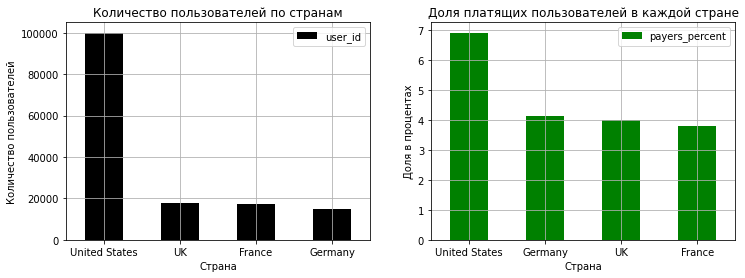

In [24]:
# Визуализируем результат:

plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 2, 1)
profiles_region.sort_values(by='user_id', ascending=False).plot.bar(
                                                           x='region', y=['user_id'], grid=True,
                                                           title='Количество пользователей по странам', 
                                                           rot=0,color='k', ax=ax1).set(xlabel='Страна', 
                                                                               ylabel='Количество пользователей')

ax2 = plt.subplot(1, 2, 2)
profiles_region.sort_values(by='payers_percent', ascending=False).plot.bar(
                                                             x='region', y=['payers_percent'], grid=True,
                                                             title='Доля платящих пользователей в каждой странe',
                                                             rot=0, color='g', ax=ax2).set(xlabel='Страна', 
                                                                                           ylabel='Доля в процентах')

plt.show()


<b> Вывод: </b>

Наибольшее число пользователей приложения - из США (100000), оставшаяся доля приходится почти поровну на пользователей Великобритании, Франции и Германии. Похожие данные приходятся и на платящих пользователей: почти 6.9% в США,  против (+/-)4% в других странах.


#### Анализ устройств пользователей

Выясним какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи



In [25]:
profiles_device = (
    profiles.groupby('device')['user_id', 'payer']
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
)
profiles_device['payers_percent'] = round(profiles_device['payer'] / profiles_device['user_id'] * 100, 2)
profiles_device.sort_values(by='payer', ascending=False)


,device,user_id,payer,payers_percent
3,iPhone,54479,3382,6.21
0,Android,35032,2050,5.85
1,Mac,30042,1912,6.36
2,PC,30455,1537,5.05


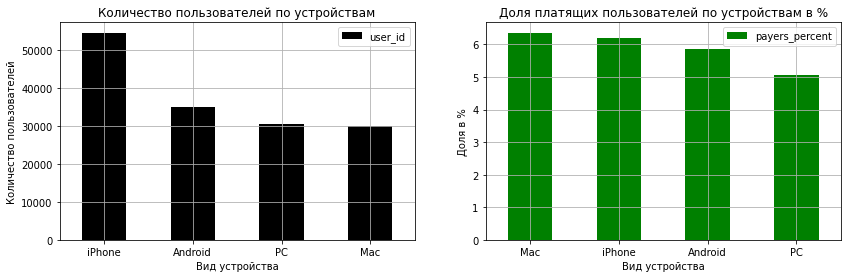

In [26]:
#Визуализируем результат:

plt.figure(figsize=(14, 4))

ax1 = plt.subplot(1, 2, 1)
profiles_device.sort_values(by='user_id', ascending=False).plot.bar(
                                                           x='device', y=['user_id'], grid=True,
                                                           title='Количество пользователей по устройствам', 
                                                            rot=0,color='k', ax=ax1).set(xlabel='Вид устройства', 
                                                                               ylabel='Количество пользователей')

ax2 = plt.subplot(1, 2, 2)
profiles_device.sort_values(by='payers_percent', ascending=False).plot.bar(
                                                             x='device', y=['payers_percent'], grid=True,
                                                             title='Доля платящих пользователей по устройствам в %',
                                                             rot=0, color='g', ax=ax2).set(xlabel='Вид устройства', 
                                                                                           ylabel='Доля в %')

plt.show()

<b> Вывод: </b>

Наибольшее количество клиентов пользуются iPhone (54479 пользователей) против 3-3.5 тыс. клиентов других устройств. Все платформы дают приблизительно равное количество платящих пользователей, около 5-6.2 %.


####  Анализ источников привлечения платящих пользователей 


Посмотрим на рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [27]:
profiles_channel = (
    profiles.groupby('channel')['user_id', 'payer']
    .agg({'user_id': 'count', 'payer':'sum'}).reset_index()
    .rename(columns={'user_id': 'users'})
)

# % пользователей канала 
profiles_channel['users_percent'] = round(profiles_channel['users'] / profiles_channel['users'].sum() * 100, 2)

# % платящих 
profiles_channel['payers_percent'] = round(profiles_channel['payer'] / profiles_channel['users'] * 100, 2)


profiles_channel.sort_values(by='users', ascending=False)

,channel,users,payer,users_percent,payers_percent
10,organic,56439,1160,37.62,2.06
1,FaceBoom,29144,3557,19.43,12.20
6,TipTop,19561,1878,13.04,9.60
4,OppleCreativeMedia,8605,233,5.74,2.71
2,LeapBob,8553,262,5.70,3.06
7,WahooNetBanner,8553,453,5.70,5.30
5,RocketSuperAds,4448,352,2.97,7.91
3,MediaTornado,4364,156,2.91,3.57
8,YRabbit,4312,165,2.87,3.83
0,AdNonSense,3880,440,2.59,11.34


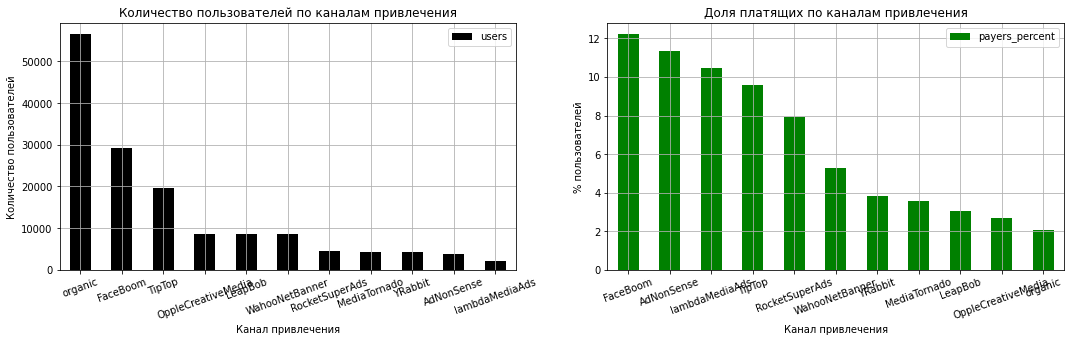

In [28]:
plt.figure(figsize=(18, 10))

ax1 = plt.subplot(2, 2, 1)
profiles_channel.sort_values(by='users', ascending=False).plot.bar(
                                                           x='channel', y=['users'],grid=True,
                                                           title='Количество пользователей по каналам привлечения', 
                                                           rot=20, color='k', ax=ax1).set(xlabel='Канал привлечения', 
                                                                               ylabel='Количество пользователей')
ax2 = plt.subplot(2, 2, 2)
profiles_channel.sort_values(by='payers_percent', ascending=False).plot.bar(
                                                             x='channel', y=['payers_percent'], grid=True,
                                                             title='Доля платящих по каналам привлечения',
                                                             rot=20, color='g', ax=ax2).set(xlabel='Канал привлечения', 
                                                                               ylabel='% пользователей')

plt.show()

Более 56 тысяч органичеcких пользователей используют приложение, но доля платящих среди такиих пользователей- самая низкая (около 2%). Самые крупные платные рекламные источники -FaceBoom и TipTop( 50% пользователей). По доле пользователей, перешедших в категорию платящих, лидируют также FaceBoom (12.2%) и AdNonSense(11.7%), и lambdaMediaAds (10.5%)


Топ3 уникальныx пользователeй:

organic - 37.6%,
FaceBoom - 19.4%,
TipTop - 13%.

Топ3 платящиx пользователeй:

FaceBoom - 12.2%,
TipTop - 9.6%,
lambdaMediaAds - 10.5%.

<b> Вывод: </b>


Наибольшее число пользователей приложения - из США (100 000), оставшаяся доля приходится почти поровну на пользователей Великобритании, Франции и Германии. Доля платящих пользователей также выше в США: 7% и 4%(+/-) в остальных странах.

Больше всего пользователей заходят в приложение с iPhone (54479) и 30=35 тыс. пользователей c других устройств, доля платящих распределена практически равномерно но всем устройствам и колеблется на уровне 5-6.2%


Наибольшее количество пользователей находят приложение сами (пользователи 'organic'), на их привлечение не требуются дополнительные расходы, но доля переходящих в категорию платящих - всего 2%.

Самые крупные платные рекламные источники -FaceBoom и TipTop, они дают компании 50% пользователей. По доле пользователей, перешедших в категорию платящих, лидируют FaceBoom (12.2%), TipTop(9.6%), и два малоиспользуемых рекламных канала- AdNonSense (11.34%) и lambdaMediaAds (10.5%).


### Маркетинг


####  Общая сумма расходов на маркетинг

In [29]:
# исключим пользователей с органическим трафиком и посчитаем расходы

profiles = profiles.query('channel != "organic"')
print(f'Общая сумма расходов на маркетинг:', round(costs['costs'].sum()))

Общая сумма расходов на маркетинг: 105497


#### Траты на каждый источник рекламы 

In [30]:
# таблицa расходов по каждому каналу

costs_channel = (
    costs.pivot_table(
        index = 'channel',
        values = 'costs', 
        aggfunc = 'sum' 
    )
    .sort_values(by='costs', ascending = False)
    .reset_index()
)
costs_channel['percent'] = round(
    costs_channel['costs'] /
    costs_channel['costs'].sum()*100, 2)
costs_channel

,channel,costs,percent
0,TipTop,54751.30,51.90
1,FaceBoom,32445.60,30.75
2,WahooNetBanner,5151.00,4.88
3,AdNonSense,3911.25,3.71
4,OppleCreativeMedia,2151.25,2.04
5,RocketSuperAds,1833.00,1.74
6,LeapBob,1797.60,1.70
7,lambdaMediaAds,1557.60,1.48
8,MediaTornado,954.48,0.90
9,YRabbit,944.22,0.90


- Расходы на маркетинг в период с 2019-05-01 по 2019-10-27 составили $105497
-  Основная доля расходов направлены на  TipTop (51.9%) и FaceBoom (30.75%).


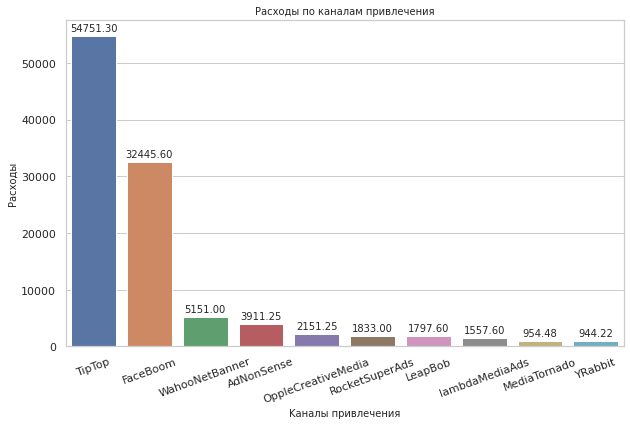

In [31]:
# график расходов по каналам привлечения

plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
plots = sns.barplot(x='channel', y='costs', data=costs_channel)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Расходы по каналам привлечения', fontsize=10)
plt.xlabel('Kаналы привлечения', fontsize=10)
plt.xticks(rotation=20)
plt.ylabel('Расходы', fontsize=10)
plt.show()

На графике можно увидеть расходы направленные на топовые каналы привлечения клиентов (TipTop и FaceBoom) в течение периода с 2019-05-01 по 2019-10-27.

####  Динамика изменения расходов во времени по каждому источнику 



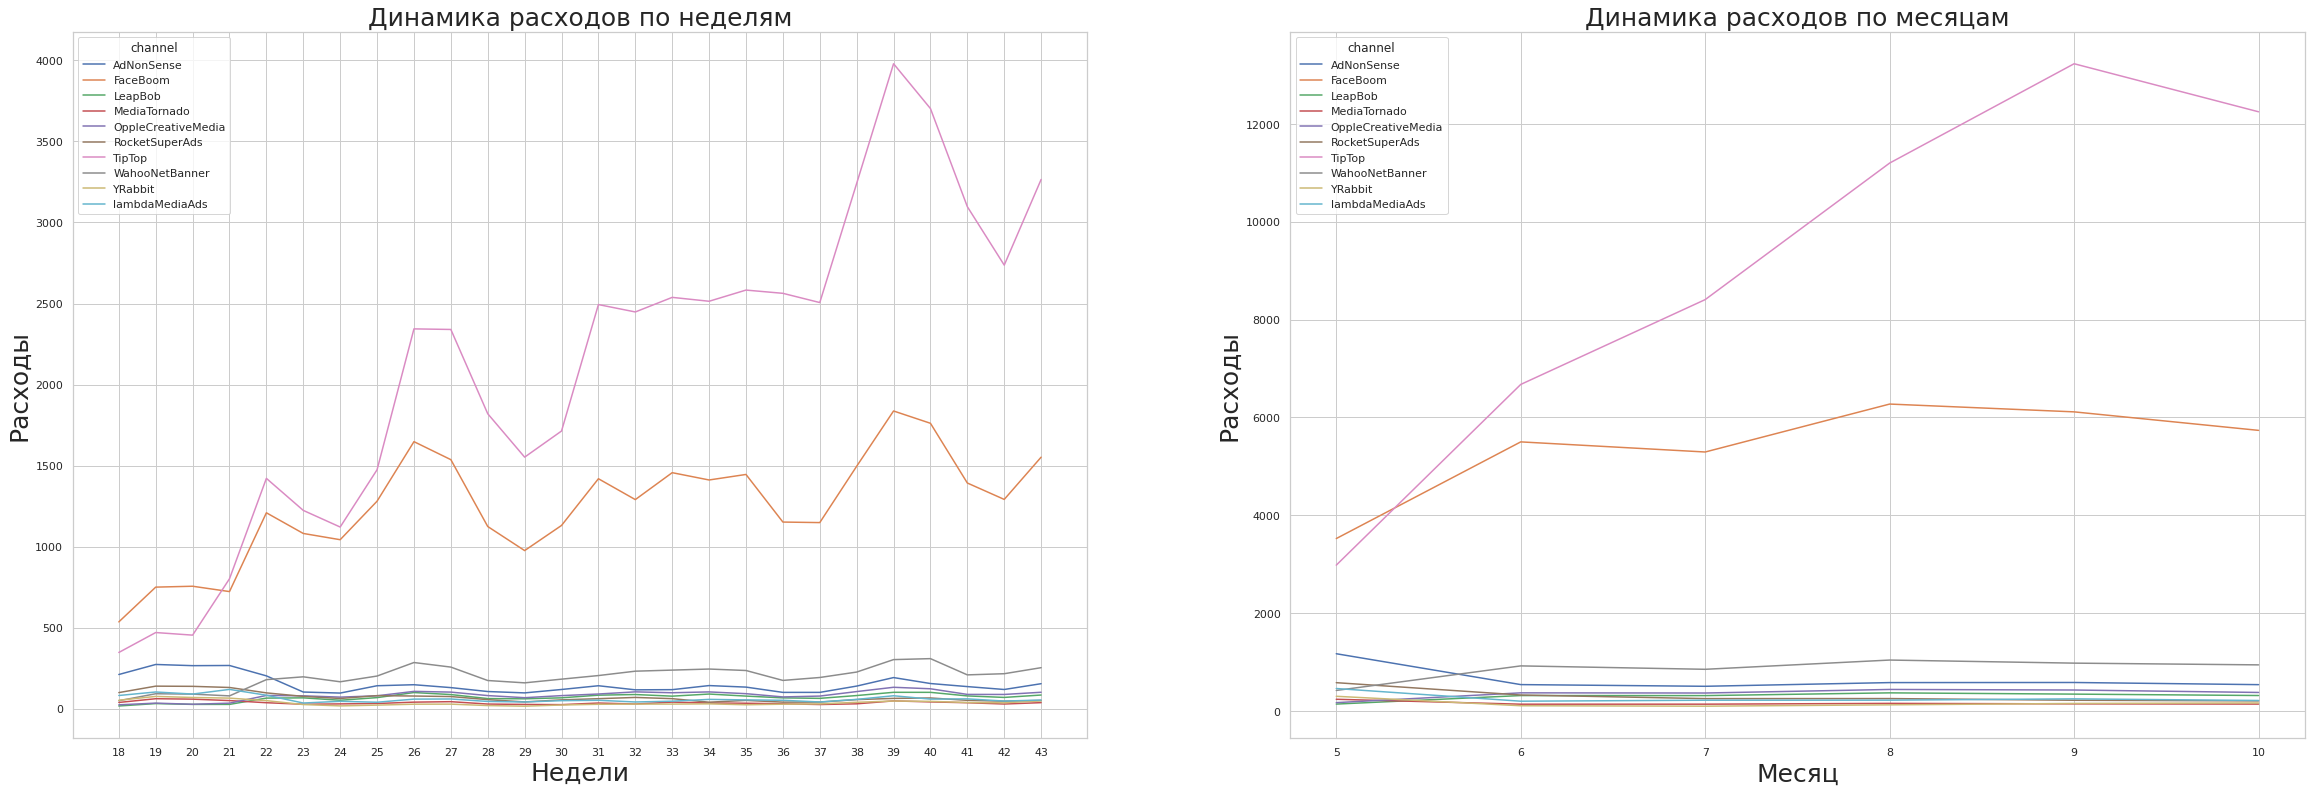

In [32]:
costs.dt = pd.to_datetime(costs.dt)
costs['week'] = costs.dt.dt.week
costs['month'] = costs.dt.dt.month

plt.figure(figsize=(40, 13))

# задаем недельные расходы
report_week = costs.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum'
)

# строим динамику затрат по неделям
report_week.T.plot(
    grid=True, xticks=list(report_week.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Динамика расходов по неделям',  fontsize=25)
plt.xlabel('Недели',  fontsize=25)
plt.ylabel('Расходы',  fontsize=25)

# задаем расходы по месяцам
report_month = costs.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')


# строим динамику затрат по месяцам
report_month.T.plot(
    grid=True, xticks=list(report_month.columns.values), ax=plt.subplot(1, 2, 2)
)
plt.title('Динамика расходов по месяцам',  fontsize=25)
plt.xlabel('Месяц', fontsize=25)
plt.ylabel('Расходы', fontsize=25)

plt.show()

Начиная с 21-й недели идет неравномерное увеличение расходов в TipTop и FaceBoom. Пик приходится на 39 неделю в Сентябре (9й месяц). В остальных источниках увеличения рекламного бюджета не наблюдается. Пик в конце сентября, начале октября может быть связан с усилиями привлечь новых пользователей


#### CAC из каждого источника

Рассчитаем средний CAC для всего проекта, но без канала Organic, используя профили пользователей


In [33]:
# Рассчитаем САС

cac_users = (profiles
              .query('channel != "organic"')[['user_id', 'acquisition_cost']]
              .drop_duplicates()
              .agg({'acquisition_cost': 'mean'})
             )
cac_users

acquisition_cost    1.127481
dtype: float64

In [34]:
# Рассчитаем САС для каждого источника
cac_channel = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean') \
                      .sort_values(by='acquisition_cost', ascending=False) \
                      .rename(columns={'acquisition_cost':'cac'}) \
                      .reset_index().style.background_gradient(sns.light_palette("brown", as_cmap=True))
cac_channel

,channel,cac
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


Больше всего средств на привлечение клиента тратитcя посредством TipTop ($ 2.80 за клиента),  далее   идет FaceBoom и AdNonSense ($ 1.11 и $ 1.01 соответственно), остальные каналы берут за пользователя от $ 0.21 до $ 0.72)


#### Вывод

Всего на маркетинг потрачено $ 105497.

Больше всего трат приходятcя на TipTop (51.9 '%') и FaceBoom (30.75 %). Далее идут WahooNetBanner (4.88%), AdNonSense (3.71%), OppleCreativeMedia (2.04%). На остальные каналы приходится 1-2% расходов.



Среди рекламных каналoв увеличиваются траты на WahooNetBanner с июня (к октябрю около $ 53). Расходы  на  AdNonSense, наоборот, снижаются с июня  (до $ 35). По остальным источникам траты варьируются в пределах $3-$ 20.


Рассчитан средний CAC на одного пользователя для всего проекта  но без канала Organic и для каждого источника трафика. Максимальная CAC-  $ 2.8 (TipTop).  Медианная стоимость CAC - $ 0.24. Cреднее значение $ 0.7. В данных возможны   влияние органического трафика или других выбросов которые сказываются на разнице значений средней и медианы.



### Оцените окупаемость рекламы


#### Общая окупаемость рекламы 

Прежде всего, рассмотрим общую окупаемость рекламы. Затем построим графики LTV и ROI и графики динамики LTV, CAC и ROI  вызвав функции get_ltv для расчетов и plot_ltv_roi - для визуализации.

In [35]:
# Исключаем всех пользователей 'organic'
profiles = profiles.query('channel != "organic"')

In [36]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа
profiles['dt'] = pd.to_datetime(profiles['dt'])

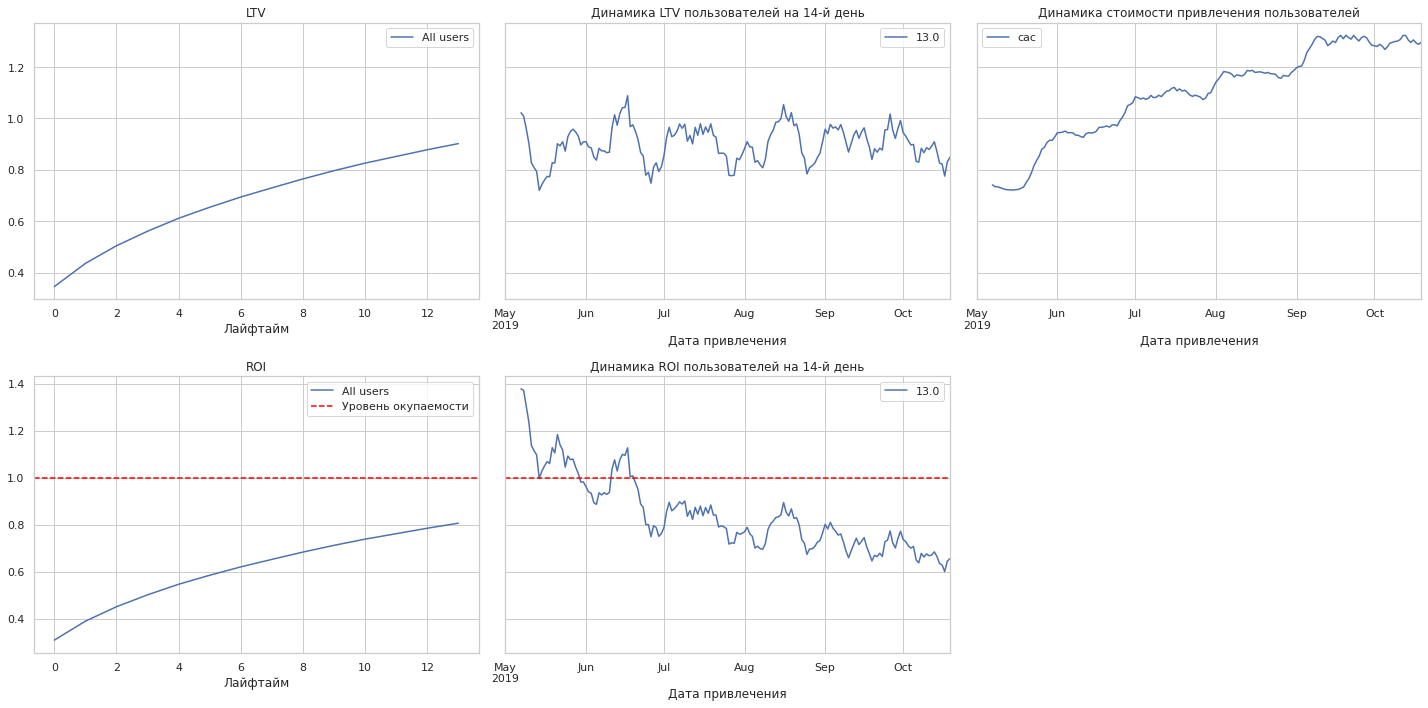

In [37]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, \
                                                                      observation_date, horizon_days)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)


По графикам можно сделать следующие выводы:

- K концу 2-ой недели pеклама ниже уровня окупаемости , ROI — около 80%.
- CAC нестабилен, расходы на рекламу увеличиваются с течением времени. 
- LTV достаточно стабилен с временными колебаниями. Это говорит о том, что проблема не в ухудшении качества пользователей.
- ROI пользователей стремительно движется вниз с середины июня до показателя 0.6.



####  Динамика конверсии и удержания пользователей 

##### Oкупаемость рекламы с разбивкой по устройствам



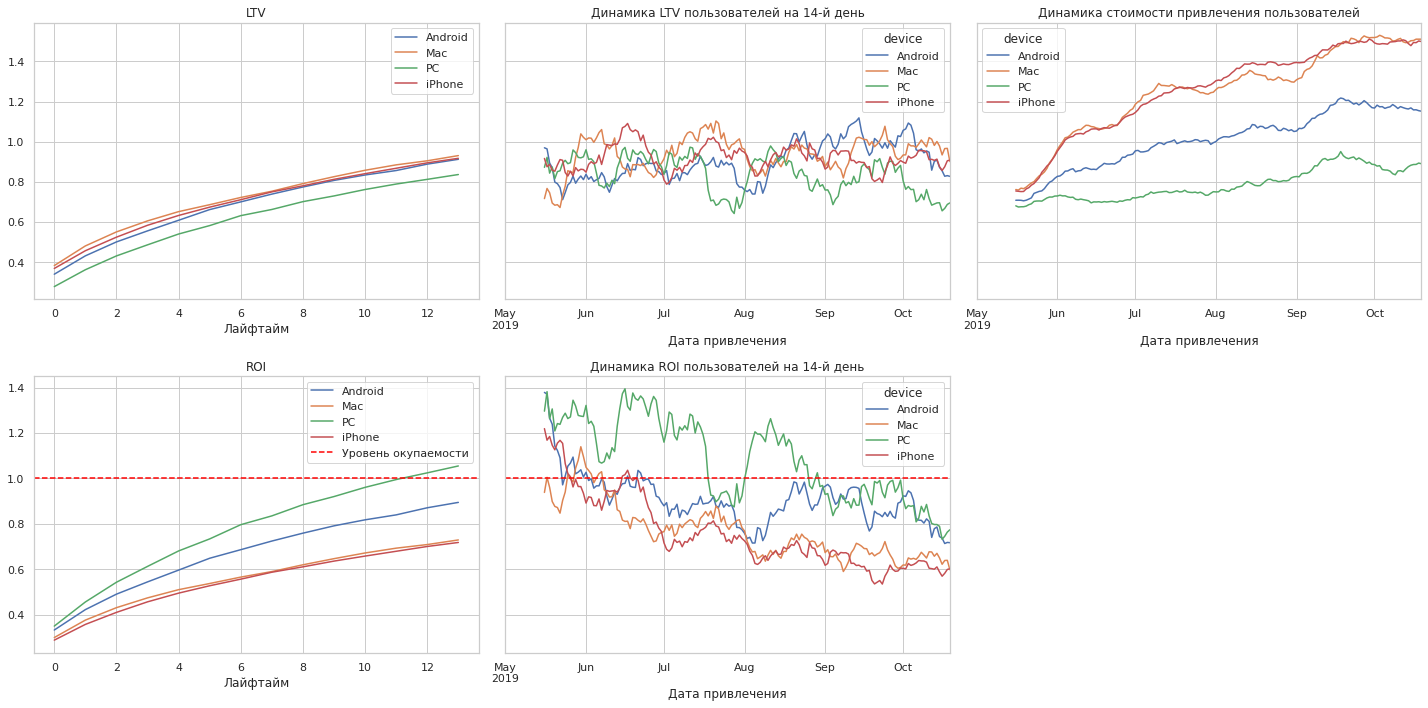

In [38]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, \
                                                                      horizon_days, dimensions= dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=16)

Расходы на привлечение клиентов растут с течением времени за рассматриваемый период. Стоимость привлечения пользователей PC самая низкая, а ROI - наоборот, выше остальных.
Реклама окупалась до июня на всех устройствах,затем идет спад,  в частности у Mac и Iphone. LTV стабилен с некоторыми колебаниями.  Надо уточнить,  что для Mac и iPhone затраты на рекламу растут, а окупаемость падает. 



Посчитаем и визуализируем конверсию, вызвав функции get_conversion()   и plot_conversion()

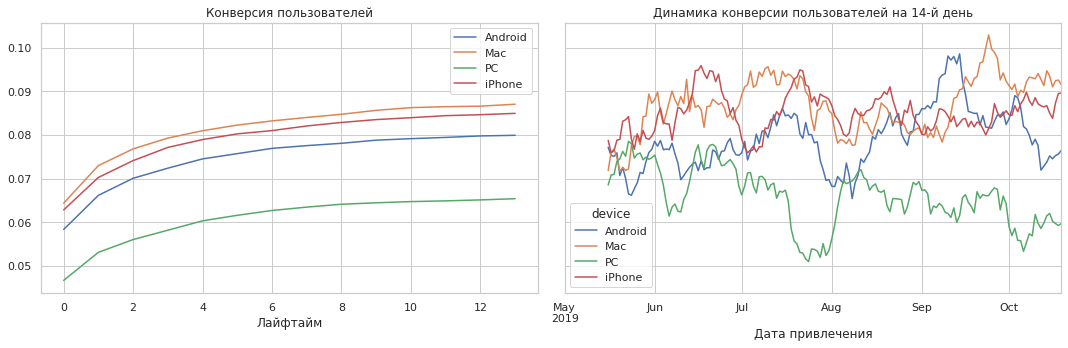

In [39]:
# конверсия с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, \
                                                                        horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=16)

Все устройства показывают не плохyю конверсию, лучшая конвесрия у iPhone и Mac.
 

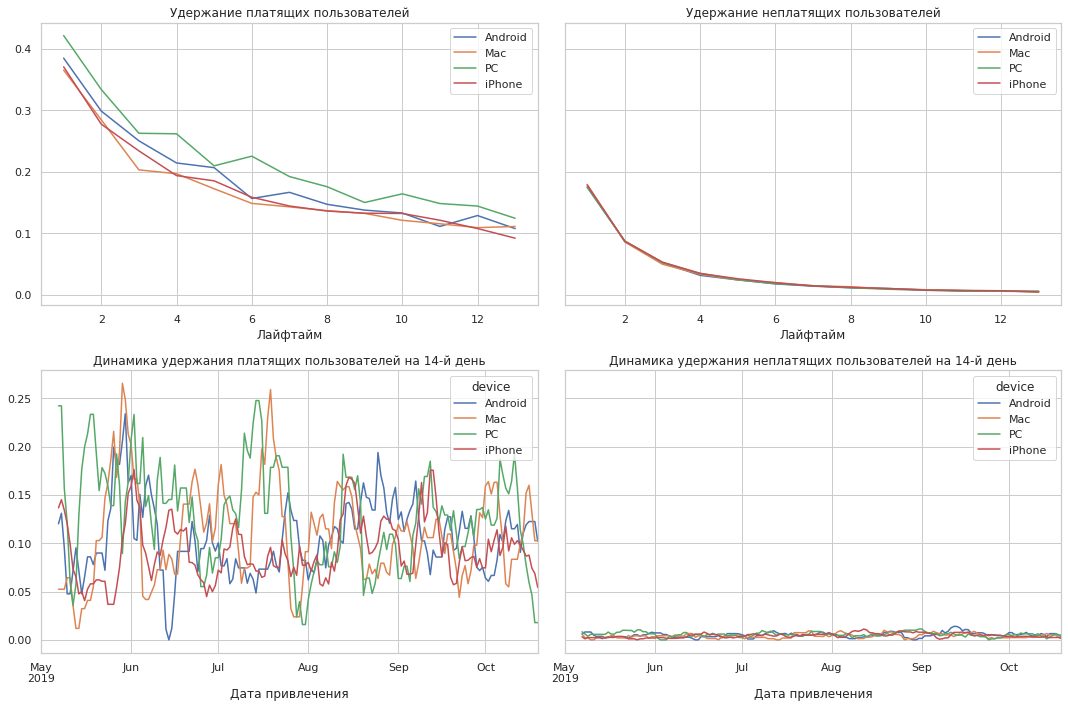

In [40]:
# удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Платящие пользователи PC лидеры по удержанию, хуже всего удерживаются владельцы устройств Apple.

##### Окупаемость рекламы с разбивкой по странам


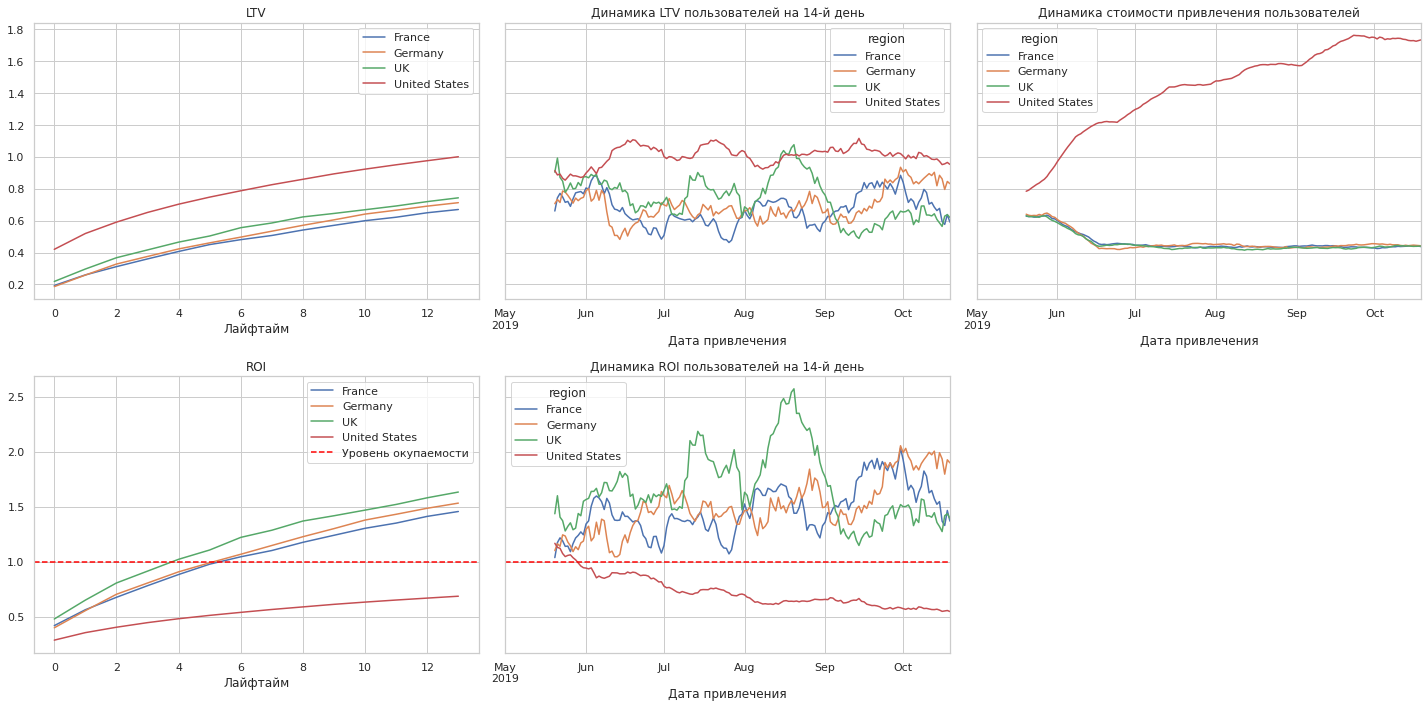

In [41]:

dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, \
                                                                      horizon_days, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=20)

В то время как, наибольший процент клиентов из США - самая низкая окупаемость рекламы именно в этом регионе, не смотря не постоянный рост расходов на рекламу. 

Заметен тренд на снижение окупаемости с конца июня 2019.


LTV всё так же стабилен.


Лучшаая окупаемость у Великобритании и Германии.


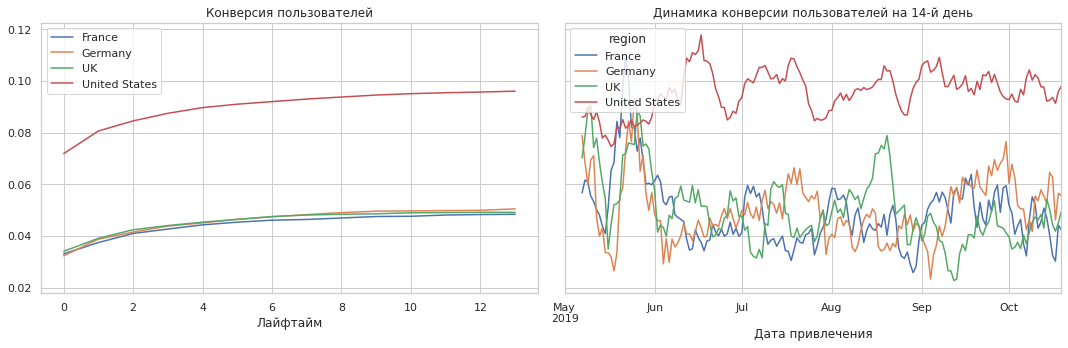

In [42]:
# конверсия с разбивкой по странам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

 Пользователи из США конвертируются намного лучше остальных.
 
 
Посмотрим на удержание с помощью функции get_retention() и plot_retention()

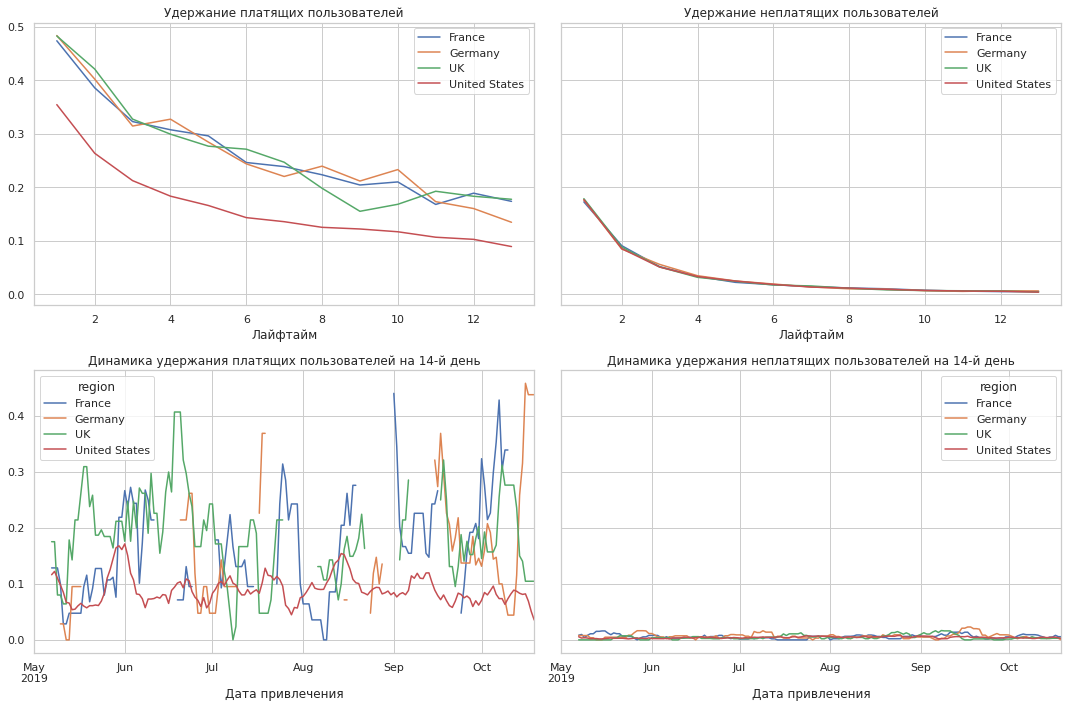

In [43]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из США удерживаются хуже пользователей из других регионов.  

Посмотрим конверсию и удержание с разбивкой по  рекламным каналам.

#### Окупаемость рекламы с разбивкой по рекламным каналам

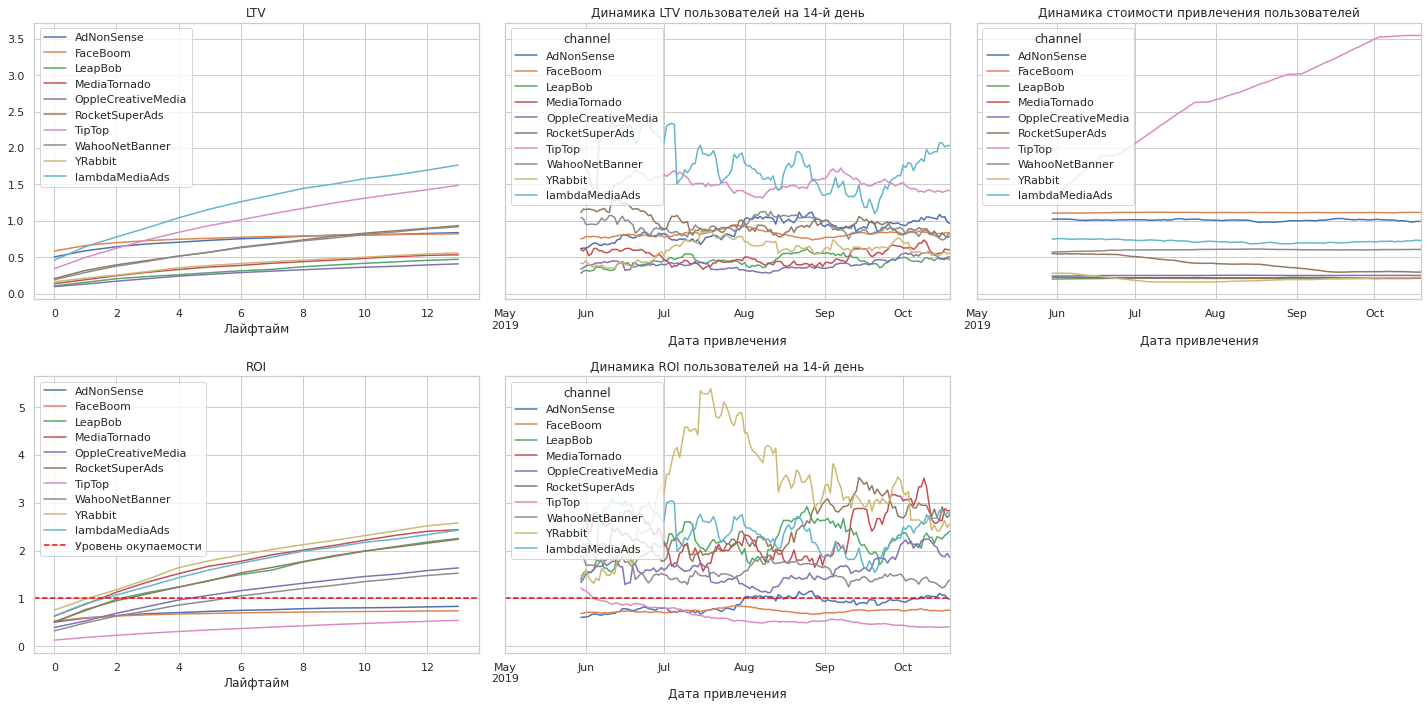

In [44]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, \
                                                                      horizon_days, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=30)

Наибольшие расходы на привлечение клиентов из TipTop'a, однако, результаты малоприятны.

Восокий ROI клиентов из YRabbit на 14 день.


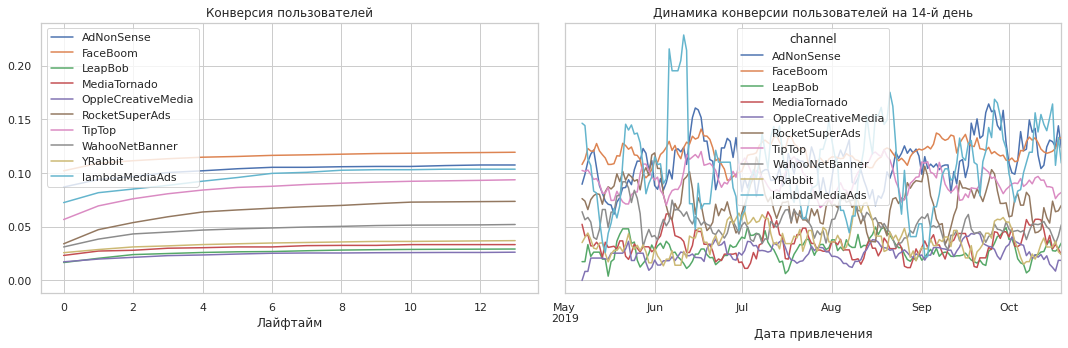

In [45]:
# конверсия с разбивкой по рекламным каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Высокая конверсия у пользователей, привлеченных посредством FaceBoom.

В целом, стабильно- низкая конверсия по всем каналам привлечения.

 У FaceBoom, AdNonSense и TipTop показатели конверсии выше чем у остальных, что может быть связано с удержанием


 Вызовем get_retention() и plot_retention()для визуализации данных.

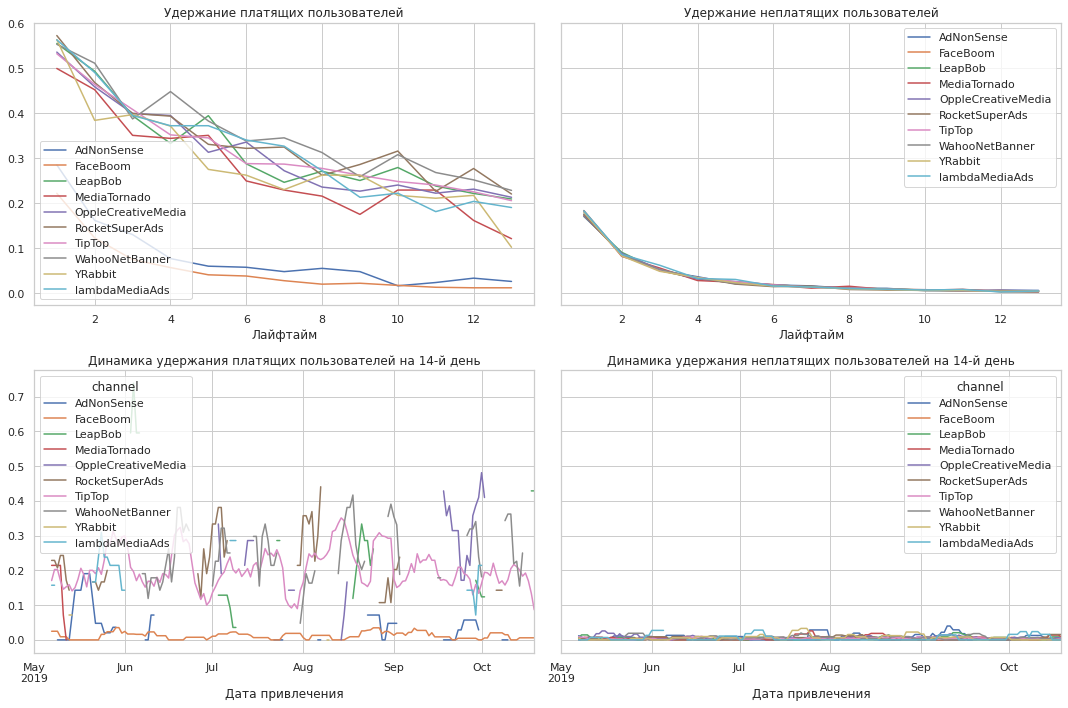

In [46]:
# удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Здесь мы наблюдаем низкое удержание платящих пользователей из FaceBoom и AdNonSense. 



По результатам анализа окупаемости рекламы можно сказать:
- в общем и целом реклама не окупается;
- реклама из США окупается плохо, а эта страна, как мы помним, основной игрок(66.7% от всех пользователей), в добавок, стоимость привлечения клиентов в этом регионе выше и периодически растёт;
- большая конверсация у клиентов из США с очевидными проблемами их удержания;
- FaceBoom не окупается, но имеет проблемы с удержанием пользователей, при этом занимает второе место по объемам затрат на рекламу;
- рекламы в FaceBoom, AdNonSense и TipTop не окупаются, на которые приходятся 35% клиентов из них 11.1% платящие.


### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Вывод и рекомендация:

 Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

Мы провели анализ данных, предоставленныx компанией-заказчиком (информация о пользователях, привлечённых с 1 мая по 27 октября 2019 года) в странах Европы (Германия, Франция и Великобритания) и в США:

- лог сервера с данными об их посещениях
- расходы на рекламу
- данные о покупках


Анализ показал, что основополагающим  фактором финансовых неудач являются усилия направленные на
 на рекламу и привлечение пользователей посредством каналов FaceBoom, TipTop в США, и AdNonSence в странах Европы (топ3 САС). 

Мы выявили:

- пользователи устройств Apple менее настроены платить, чем пользователи других платформ;

- затраты на FaceBoom, TipTop и AdNonSence с горизонтом событий в две недели, на которые приходятся 11.1% платящиx клиентов, не окупаются;

- плохая удерживаемость клиентов у FaceBoom и AdNonSence;

- затраты на TipTop выросли почти в три раза в течении 6 месяцев;

- Неверный выбор каналов привлечения пользователей и трат на маркетинг - основной фактор неэффективности привлечения пользователей

Рекомендации:

- Увеличить финансирование RocketSuperAds, WahooNetBanner и lambdaMediaAds т.к. у этих каналов хорошие показателей конверсии и окупаемости;
- Oптимизировать работy с рекламными источниками TipTop и FaceBoom в США, большая часть затрат приходится именно на эти каналы. Необходимо снизить показатели CAC;
- Привлекать больше PC и Android пользователей;

- Нужно пересмостреть рекламный бюджет в странах Европы y AdNonSence удержание платящих клиентов ниже, чем у остальных каналов;
- Во Франции с августа по октябрь имеются проблемы с удержанием пользователей на 14-й день;
- В Германии стоит обратить внимание на показатели удерживаемости. Eсть отсутствующие данные, это говорит о том, что удерживаемость клиентов менее 14 дней
- В целом стоит pассмотреть возможность перераспределения финансирования с малоэффективных каналов на MediaTornado, RocketSuperAds, YRabbit.
